#### 목표 : 생선 품종 분류 모델
- 데이터 : fish.csv
- 피  쳐 : Weight, Length
- 타  겟 : Species
- 기계합습: 지도학습 + 분류 (도미, 빙어 분류는 이진분류)

(1) 모듈 로딩 및 데이터 준비 <hr>

In [38]:
# 데이터 분석 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
# 데이터 파일(df)설정 및 데이터프레임 형태로 준비
df = pd.read_csv('../data/fish.csv',usecols=[0,1,2])
df

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [40]:
# 기본정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


(2) 데이터 전처리
- 결측치, 중복데이터, 이상치

In [41]:
# 컬럼별 고유값으로 이상치 체크
print(df.Species.unique())
print(df.Weight.unique())
print(df.Length.unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
[ 242.   290.   340.   363.   430.   450.   500.   390.   475.   600.
  700.   610.   650.   575.   685.   620.   680.   725.   720.   714.
  850.  1000.   920.   955.   925.   975.   950.    40.    69.    78.
   87.   120.     0.   110.   150.   145.   160.   140.   169.   161.
  200.   180.   272.   270.   306.   540.   800.    55.    60.    90.
  170.   273.   300.     5.9   32.    51.5   70.   100.    80.    85.
  115.   125.   130.   135.   225.   188.   197.   218.   260.   265.
  250.   320.   514.   556.   840.   690.   900.   820.  1015.  1100.
  345.   456.   510.   567.   770.  1250.  1600.  1550.  1650.     6.7
    7.5    7.     9.7    9.8    8.7   10.     9.9   12.2   13.4   19.7
   19.9]
[25.4 26.3 26.5 29.  29.7 30.  30.7 31.  31.5 32.  33.  33.5 34.  34.5
 35.  36.  37.  38.5 39.5 41.  14.1 18.2 18.8 19.8 20.  20.5 20.8 21.
 22.  22.5 24.  23.4 23.5 25.2 26.  27.  31.7 28.  36.4 40.  14.7 15.5
 17.7 19.  20.7

In [42]:
# 결측치 체크 => isna(), /isnull()
df.isna().sum()

Species    0
Weight     0
Length     0
dtype: int64

In [43]:
# 중복데이터 => duplicated()
df.duplicated().sum()

4

In [44]:
df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [45]:
# 'Bream', 'Smelt' 두 종류만 출력
mask = df.Species.isin(['Bream','Smelt'])
twoFishDF=df[mask]
twoFishDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [46]:
# 인덱스 리셋: 기존 인덱스 삭제 후 0-base 인덱스 설정
# Scikit-learn에 저장 시 ndarray 타입으로 저장되면서 인덱스 정리
twoFishDF=twoFishDF.reset_index(drop=True)

(3) 학습용 데이터 준비 => 피쳐 + 타겟 분리

In [47]:
# 피쳐 데이터 추출
feature = twoFishDF[twoFishDF.columns[1:]]
feature.head()

,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
4,430.0,29.0


In [48]:
# 타겟 데이터 추출
target = twoFishDF.Species

# Bream => 0, Smelt => 1 로 변rud
target=target.replace({'Bream':0, 'Smelt':1}).copy()



# 데이터 확인
target.head(), target.tail()

(0    0
 1    0
 2    0
 3    0
 4    0
 Name: Species, dtype: int64,
 44    1
 45    1
 46    1
 47    1
 48    1
 Name: Species, dtype: int64)

(4) 학습 진행  
    - 알고리즘 구현 인스턴스 생성 => 지도학습 -분류 알고리즘 중 선택  : KNN 
    - 학습 진행 메서드 => fit()  
    

In [62]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  49 non-null     float64
 1   Length  49 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


In [49]:

# 모듈 로딩
from sklearn.neighbors import KNeighborsClassifier

In [50]:
# (4-1) KNN 인스턴스 생성
model = KNeighborsClassifier()
# model.classes_          #'_'= 몇개를 분류할 지 모른다

In [51]:
# (4-2) 학습진행 fit(2D, 1D)
model.fit(feature,target)

KNeighborsClassifier()

In [52]:
# 학습 후 속성 확인 => 속성명_ : 모델 파라미터 -> 모델 학습 후 생성 및 저장됨
print("classes_: ", model.classes_)
print("feature_names_in_ :", model.feature_names_in_)
print("n_features in :", model.n_features_in_)



classes_:  [0 1]
feature_names_in_ : ['Weight' 'Length']
n_features in : 2


(5) 학습 후 검사 즉 테스트 => 메서드 : score()
- 결과 값:0.0(0% ~ 1.0(8

In [53]:
# 모듈 로딩

In [54]:
model.score(feature,target)

1.0

(6) 예측 즉 서비스에 모델활용시 사용 => 메서드:predict() : 결과만 주는 애
                                             predict_proba() : 확률을 주는 애
- 조건: 학습시 전달된 데이터와 동일한 형태의 데이터 전달

In [55]:
# [무게, 길이]
new_data =pd.DataFrame([[21.8,17]] ,columns=model.feature_names_in_)

# 학습 시 제공된 데이터와 동일한 형태로 제공
pred_y = model.predict(new_data)

pred_y

array([1], dtype=int64)

In [56]:
feature

,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
4,430.0,29.0
5,450.0,29.7
6,500.0,29.7
7,390.0,30.0
8,450.0,30.0
9,500.0,30.7


In [57]:
# 예측 확률
model.predict_proba(new_data)

array([[0., 1.]])

In [77]:
# 데이터와 최근접 이웃 데이터 찾기 => kneighbors() 메서드
# 반환값 : 거리, 원소번호(=인덱스)

dis, ind = model.kneighbors(new_data)
ind.tolist()

[[48, 47, 45, 46, 44]]

In [71]:
# kneighbor의 최근접 데이터 5개를 저장
kneighDF=feature.iloc[ind.tolist()[0]]
kneighDF

,Weight,Length
48,19.9,15.0
47,19.7,14.3
45,13.4,12.4
46,12.2,13.0
44,12.2,12.2


In [59]:
feature.index, feature.shape

(RangeIndex(start=0, stop=49, step=1), (49, 2))

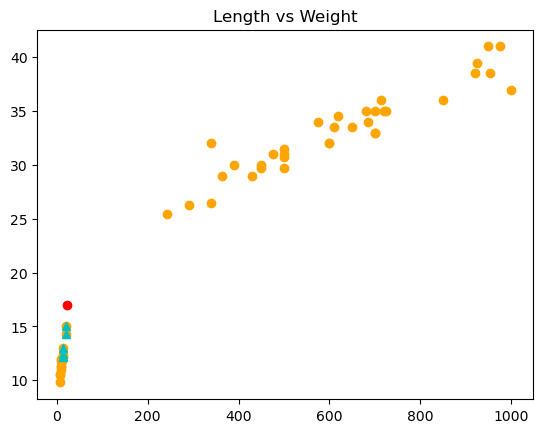

In [76]:
# Weight & Length 시각화

plt.scatter(feature.Weight,feature.Length,c='orange' )
plt.title('Length vs Weight')

# 새로운 데이터 시각화
plt.plot(new_data.Weight[0],new_data.Length[0], 'ro')

# 새로운 데이터 K개의 최근접 이웃 데이터 시각화
plt.plot(kneighDF.Weight,kneighDF.Length, 'c^')

plt.show()